In [1]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [3]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

'/home/aiffel-d34j/aiffel/sia_gis/data/buildings/training/raw/BLD00001_PS3_K3A_NIA0276.png'

In [4]:
# src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
src = cv2.imread(img_src, cv2.IMREAD_COLOR)

src.shape

(1024, 1024, 3)

## CLAHE

### RGB color image

In [5]:
import numpy as np
import cv2

def clahe_rgb(img_src, num_grid):
    # 이미지 읽기
    src = cv2.imread(img_src, cv2.IMREAD_COLOR)  # 칼라 이미지의 경우

    # bgr 색공간 이미지를 lab 색공간 이미지로 변환
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)

    # l, a, b 채널 분리
    l, a, b = cv2.split(lab)

    # CLAHE 객체 생성 : contrast limited adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(num_grid, num_grid))

    # CLAHE 객체에 l 채널 입력하여 CLAHE가 적용된 l 채널 생성 
    l = clahe.apply(l)

    # l, a, b 채널 병합
    lab = cv2.merge((l, a, b))

    # lab 색공간 이미지를 bgr 색공간 이미지로 변환
    cont_dst = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return src, cont_dst


    
src, cont_dst8 = clahe_rgb(img_src, num_grid=8)    


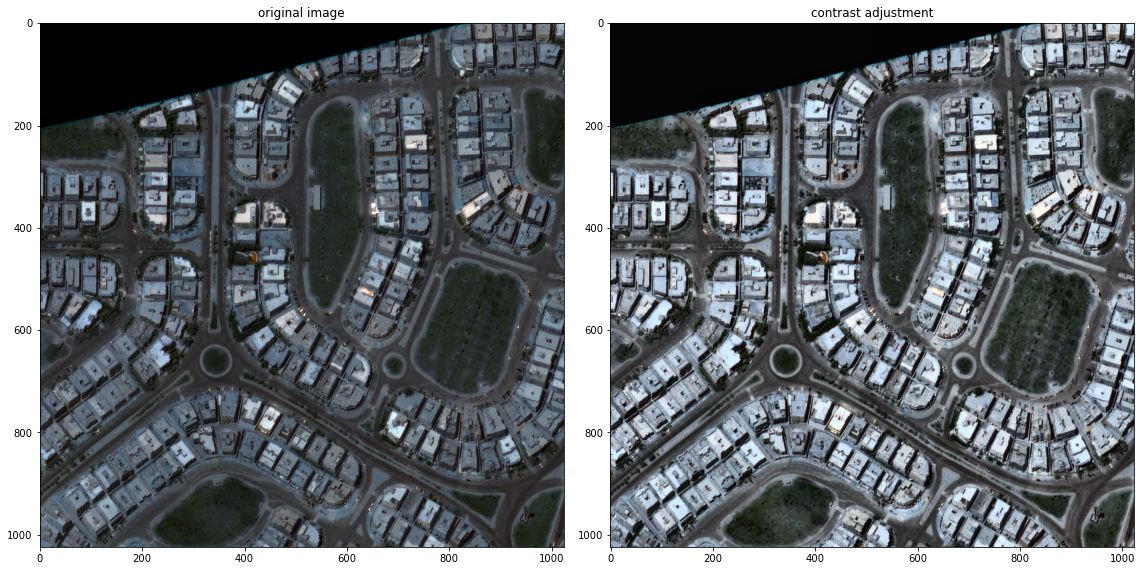

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst8)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [7]:
src, cont_dst16 = clahe_rgb(img_src, num_grid=16)   

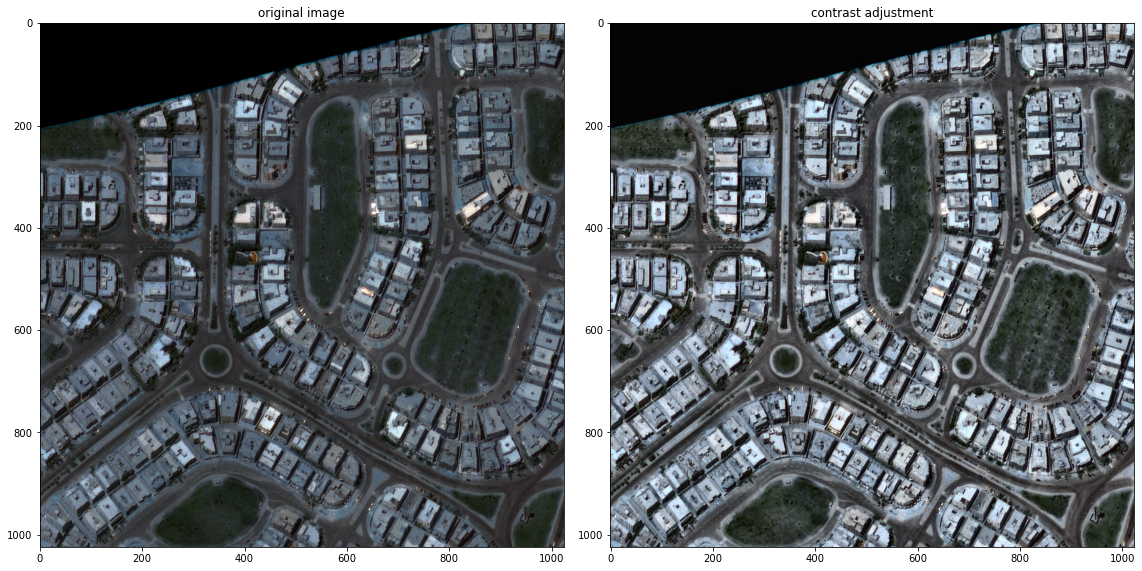

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst16)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [9]:
src, cont_dst32 = clahe_rgb(img_src, num_grid=32)   

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst32)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [ ]:
src, cont_dst64 = clahe_rgb(img_src, num_grid=64)   

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst64)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

### clahe results - tile grid size 

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(cont_dst8)
ax1.set_title('tile grid size : 8')
ax2.imshow(cont_dst16)
ax2.set_title('tile grid size : 16')
ax3.imshow(cont_dst32)
ax3.set_title('tile grid size : 32')
ax4.imshow(cont_dst64)
ax4.set_title('tile grid size : 64')

plt.tight_layout()
plt.show()

### YUV color image

In [ ]:
def clahe_yuv(img_src, num_grid):
    # 이미지 읽기
    src = cv2.imread(img_src, cv2.IMREAD_COLOR)  # 칼라 이미지의 경우

    # bgr 색공간 이미지를 yuv 색공간 이미지로 변환
    yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV)

    # y, u, v 채널 분리
    y, u, v = cv2.split(yuv)

    # CLAHE 객체 생성 : contrast limited adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(num_grid, num_grid))

    # CLAHE 객체에 y 채널 입력하여 CLAHE가 적용된 y 채널 생성 
    y = clahe.apply(y)
#     yuv[:,:,0] = clahe.apply(yuv[:,:,0])

    # y, u, v 채널 병합
    yuv = cv2.merge((y, u, v))

    # yuv 색공간 이미지를 bgr 색공간 이미지로 변환
    cont_dst = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    
    return src, cont_dst


    
src, cont_yuv = clahe_yuv(img_src=img_src, num_grid=16) 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_yuv)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

### HSV color image

In [ ]:
def clahe_hsv(img_src, num_grid):
    # 이미지 읽기
    src = cv2.imread(img_src, cv2.IMREAD_COLOR)  # 칼라 이미지의 경우

    # bgr 색공간 이미지를 hsv 색공간 이미지로 변환
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    # h, s, v 채널 분리
    h, s, v = cv2.split(hsv)

    # CLAHE 객체 생성 : contrast limited adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(num_grid, num_grid))

    # CLAHE 객체에 v 채널 입력하여 CLAHE가 적용된 v 채널 생성 
    v = clahe.apply(v)
#     hsv[:,:,2] = clahe.apply(hsv[:,:,2])

    # h, s, v 채널 병합
    hsv = cv2.merge((h, s, v))

    # hsv 색공간 이미지를 bgr 색공간 이미지로 변환
    cont_dst = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return src, cont_dst


    
src, cont_hsv = clahe_hsv(img_src=img_src, num_grid=16) 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_hsv)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

### clahe results - color space

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst16)
ax2.set_title('RGB, 16')
ax3.imshow(cont_yuv)
ax3.set_title('YUV, 16')
ax4.imshow(cont_hsv)
ax4.set_title('HSV, 16')

plt.tight_layout()
plt.show()

* [OpenCV - Python 컬러 이미지 대비 조정](https://velog.io/@oosiz/OpenCV-Python-컬러-이미지-대비-조정)
* [OpenCV - CIELAB 색 공간](https://ko.wikipedia.org/wiki/CIELAB_색_공간)
  - `L*` 값은 밝기, 
    - L* = 0 이면 검은색이며, L* = 100 이면 흰색을 나타낸다
  - `a*`은 빨강과 초록 중 어느쪽으로 치우쳤는지를 나타낸다
    - `a*`이 음수이면 초록에 치우친 색깔이며, 양수이면 빨강/보라 쪽으로 치우친 색깔이다
  - `b*`은 노랑과 파랑을 나타낸다. b*이 음수이면 파랑이고 b*이 양수이면 노랑이다  
  
* [OpenCV - Color conversions](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)

* [OpenCV - CLAHE](https://blog.naver.com/samsjang/220543360864)
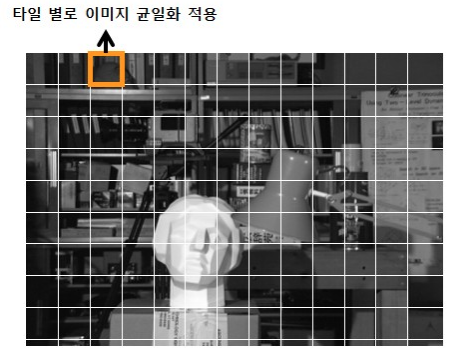
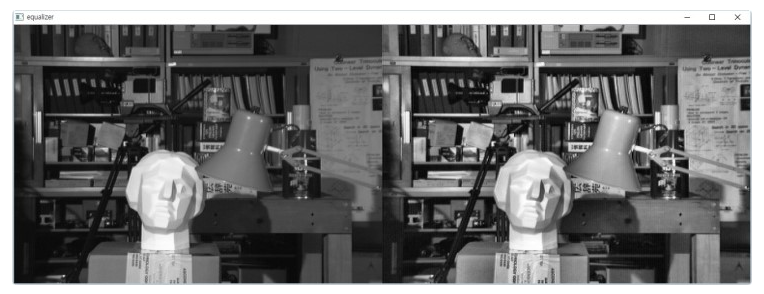

* [참고: OpenCV - 5. 창 관리 및 이벤트 처리](https://bkshin.tistory.com/entry/OpenCV-5-창-관리-및-이벤트-처리)
* [OpenCV - 컴퓨터 비전 애플리케이션을 개발하기 위한 오픈소스 라이브러리](https://gist.github.com/Curookie/a2f069522c90ab9947d687778cfa7536)

* [Brightness(밝기)와 Contrast 조절](https://swprog.tistory.com/entry/Image-processing-Brightness-Contrast-밝기-대비)
* [OpenCV - 영상 명암 대비 조절하기](https://blog.naver.com/qbxlvnf11/221288082020)
* [[파이썬 OpenCV] 영상의 명암비 조절 - 히스토그램 스트레칭, 정규화](https://deep-learning-study.tistory.com/121)
* 

## np.clip

* `numpy.clip(array, min, max)` : [참고: 배열에서 0보다 작은 수를 0으로 변환하는 방법](https://rfriend.tistory.com/426)

    - array 내의 element들에 대해서

    - min 값 보다 작은 값들을 min값으로 바꿔주고

    - max 값 보다 큰 값들을 max값으로 바꿔주는 함수.
    
    - 그레이스케일의 픽셀값을 조정하여 명암비를 조절

In [ ]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [ ]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

In [ ]:
# src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
src = cv2.imread(img_src, cv2.IMREAD_COLOR)

src.shape   # (height, width, channel) 

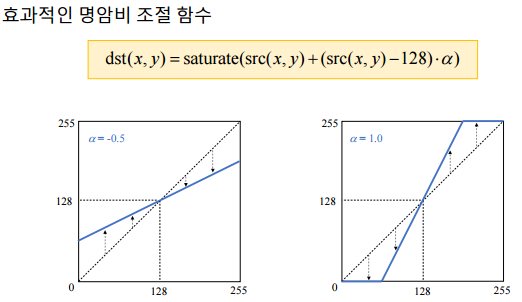

In [ ]:
alpha = 1 # 기울기
dst = np.clip(((1 + alpha) * src - 128 * alpha), 0, 255).astype(np.uint8)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

## 정규화 (cv2.normalize)

* `cv2.normalize(src, dst, alpha=None, beta=None, norm_type=None, dtype=None, mask=None)` :
    - src: 입력 영상
    - dst: 결과 영상 (None 입력)
    - alpha: (노름 정규화인 경우) 목표 노름 값, (원소 값 범위 정규화인 경우) 최솟값
    - beta: (원소 값 범위 정규화인 경우) 최댓값
    - norm_type: 정규화 타입. NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX.
        - 히스토그램 스트레칭은 NORM_MINMAX
    - dtype: 결과 영상의 타입
    - mask: 마스크 영상
    - [참고1](https://deep-learning-study.tistory.com/121)
    - [참고2](https://bkshin.tistory.com/entry/OpenCV-10-히스토그램)
    
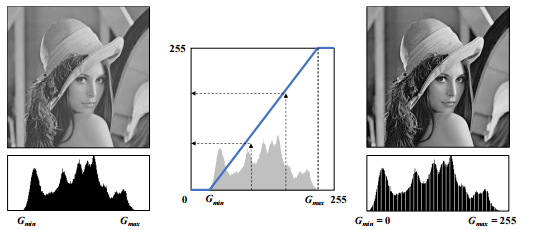

In [ ]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [ ]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

In [ ]:
# src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
src = cv2.imread(img_src, cv2.IMREAD_COLOR)

src.shape   # (height, width, channel) 

In [ ]:
# 히스토그램 계산 및 그리기
channels = cv2.split(src)
colors = ('b', 'g', 'r')

for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    
plt.show()

In [ ]:
# 직접 연산한 정규화
gmin = np.min(src)
gmax = np.max(src)
dst = np.clip((src - gmin) * 255. / (gmax - gmin), 0, 255).astype(np.uint8)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [ ]:
# OpenCV API를 이용한 정규화
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX) # 히스토그램 스트레칭은 NORM_MINMAX

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

## 평탄화(equalization)

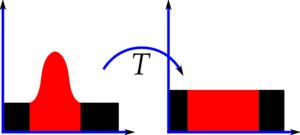

* [참고: Python과 OpenCV – 21 : 히스토그램(Histogram) 2/4](http://www.gisdeveloper.co.kr/?p=6652)
* [참고: OpenCV - 10. 히스토그램과 정규화(Normalize), 평탄화(Equalization), CLAHE](https://bkshin.tistory.com/entry/OpenCV-10-히스토그램)

In [ ]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [ ]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

In [ ]:
# src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
src = cv2.imread(img_src, cv2.IMREAD_COLOR)

src.shape   # (height, width, channel) 

In [ ]:
# 이퀄라이즈 연산을 직접 적용
rows, cols = src.shape[:2]

hist = cv2.calcHist([src], [0], None, [256], [0, 256])  #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)

dst_rgb = cdf[src]                                         # 히스토그램을 픽셀로 맵핑

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst_rgb)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [ ]:
# OpenCV API로 이퀄라이즈 히스토그램 적용
grayimg = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(grayimg)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

## 색공간 변경

In [ ]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [ ]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

### RGB color space

In [ ]:
# 기본 값 옵션
img = cv2.imread(img_src)   

# IMREAD_COLOR 옵션                   
img_bgr = cv2.imread(img_src, cv2.IMREAD_COLOR)    

# IMREAD_UNCHANGED 옵션
bgra = cv2.imread(img_src, cv2.IMREAD_UNCHANGED) 

# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", img_bgr.shape, "unchanged", bgra.shape)  

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(img)
ax1.set_title('original image')
ax2.imshow(img_bgr)
ax2.set_title('bgr image')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 8))
ax3.imshow(bgra)
ax3.set_title('bgra image')
ax4.imshow(bgra[:,:,3]) # 알파 채널만 표시
ax4.set_title('alpha channel image')

plt.tight_layout()
plt.show()

### YUV color space

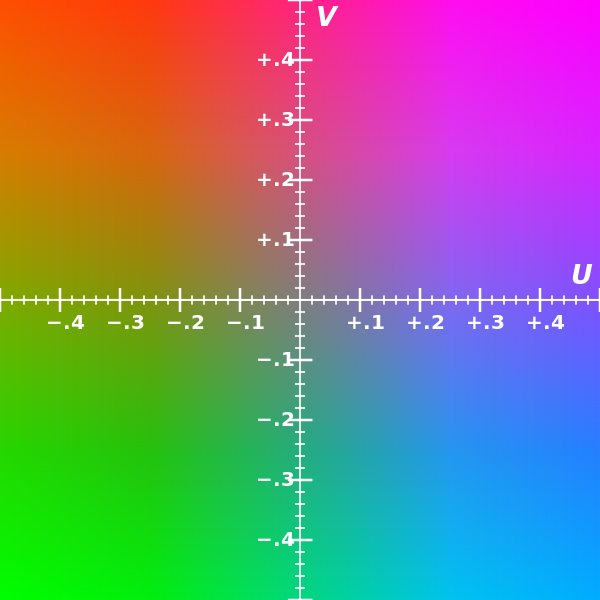

In [ ]:
# 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV) 

# YUV 컬러 스케일의 첫번째 채널(Y)에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

# 컬러 스케일을 YUV에서 BGR로 변경
dst_yuv = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst_yuv)
ax2.set_title('contrast adjustment')

plt.tight_layout()
plt.show()

### HSV color space

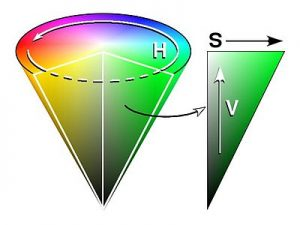  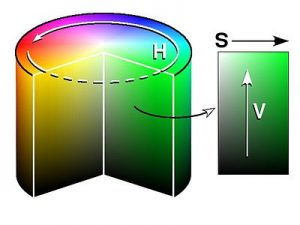

* H 값은 이미지가 어떤 색상인지를 나타냅니다. 
* S는 이미지의 색상이 얼마나 순수하게 포함되어 있는지를 나타냅니다. 
* V는 색상이 얼마나 밝은지 어두운지를 표현합니다. 

* [참고: python - OpenCV를 사용하여 한 장의 컬러 사진의 자동 대비 및 밝기 조정](https://www.python2.net/questions-837828.htm)

In [ ]:
# 컬러 스케일을 BGR에서 HSV로 변경
img_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) 

# HSV 컬러 스케일의 세번째 채널(V)에 대해서 이퀄라이즈 적용
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2]) 

# 컬러 스케일을 HSV에서 BGR로 변경
dst_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR) 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst_hsv)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

### Color space results

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(img_bgr)
ax2.set_title('RGB color space')
ax3.imshow(img_yuv)
ax3.set_title('YUV color space')
ax4.imshow(img_hsv)
ax4.set_title('HSV color space')

plt.tight_layout()
plt.show()

### Equalization results

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(dst_rgb)
ax2.set_title('RGB equalization')
ax3.imshow(dst_yuv)
ax3.set_title('YUV equalization')
ax4.imshow(dst_hsv)
ax4.set_title('HSV equalization')

plt.tight_layout()
plt.show()